Import Libraries

In [309]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.filters import gaussian, threshold_otsu, threshold_multiotsu
from skimage.morphology import remove_small_objects, disk, binary_closing
from scipy.ndimage import zoom
from skimage.measure import label, regionprops
import skimage.io as io
from skimage import measure
from skimage import exposure
from czifile import imread
from cellpose import models, plot 

Define Sub Functions

In [310]:
def display_image(image, path, type):
    """Display the image."""
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"{path} {type}")
    plt.show()

def extract_image_paths(folder):
    """Extract all image file paths from the specified folder."""
    return [os.path.join(folder, f) for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

def read_image(image_path):
    """Read the LSM image from the specified path."""
    return imread(image_path)


def otsu_thresholding_c12(channel):
    """Apply Otsu's thresholding to the channel."""
    threshold_value = threshold_otsu(channel)
    print(threshold_value)
    disappearing_value = 1200
    valid = True
    if threshold_value < disappearing_value:
        #threshold_value = disappearing_value
        valid = False
    binary_image = channel > threshold_value
    return binary_image, valid

def otsu_thresholding_deep_red(channel):
    """Apply Otsu's thresholding to the channel."""
    threshold_value = threshold_otsu(channel)
    print(threshold_value)
    disappearing_value = 3200
    valid = True
    if threshold_value < disappearing_value:
        threshold_value = disappearing_value
        valid = False
    binary_image = channel > threshold_value
    return binary_image, valid

def extract_channels(image):
    return image[0], image[1], image[2]

def analyze_image_c12(image_path):
    image = read_image(image_path)
    image_squeezed = np.squeeze(image) 
    deep_red, c12, green_channel = extract_channels(image_squeezed)

    binary_image, valid = otsu_thresholding_c12(c12)
    if valid == False:
        print(f"bleedthrough detected {image_path}") 
    display_image(binary_image, image_path, "c12")
    return binary_image


def analyze_image_deep_red(image_path):
    image = read_image(image_path)
    image_squeezed = np.squeeze(image) 
    deep_red, c12, green_channel = extract_channels(image_squeezed)
    
    binary_image, valid = otsu_thresholding_deep_red(deep_red)
    if valid == False:
        print(f"bleedthrough detected {image_path}") 
    display_image(binary_image, image_path, "deep red")
    return binary_image

def substract_masks(mask1, mask2):
    xor_mask = np.logical_xor(mask1, mask2)
    label_image = label(xor_mask)
    return label_image

def deep_red_only_mask(mask1, mask2):
    red_mask = np.logical_and(mask1, mask2)
    label_image = label(red_mask)
    return label_image

def c12_only_mask(mask1, mask2):

def circularity_index(mask):
    circularity_indices = []
    for region in regionprops(mask):
        area = region.area
        perimeter = measure.perimeter(region.image)
        perimeter = measure.perimeter(region.image)  # Calculate perimeter for the region
        if perimeter > 0:  # Avoid division by zero
            circularity = (4 * np.pi * area) / (perimeter ** 2)
        else:
            circularity = 0  # If perimeter is zero, set circularity to 0
        circularity_indices.append(circularity)
        #display_image(region.image, region.label, "mask")
        print(f"Object {region.label}: Area = {area}, Perimeter = {perimeter:.2f}, Circularity = {circularity:.2f}")


Main Function

5072


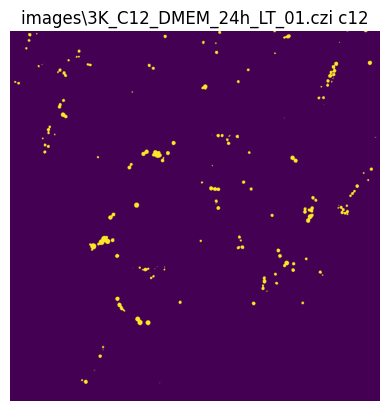

8289


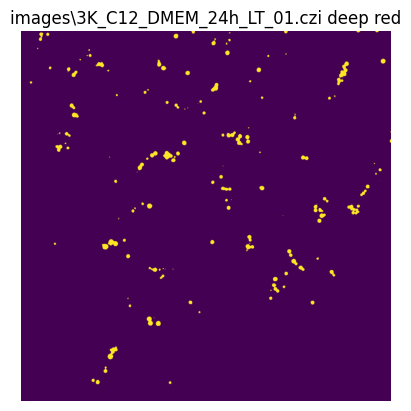

Object 1: Area = 77.0, Perimeter = 32.31, Circularity = 0.93
Object 2: Area = 60.0, Perimeter = 32.52, Circularity = 0.71
Object 3: Area = 45.0, Perimeter = 32.35, Circularity = 0.54
Object 4: Area = 34.0, Perimeter = 25.35, Circularity = 0.66
Object 5: Area = 3.0, Perimeter = 1.41, Circularity = 18.85
Object 6: Area = 3.0, Perimeter = 1.41, Circularity = 18.85
Object 7: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 8: Area = 115.0, Perimeter = 74.28, Circularity = 0.26
Object 9: Area = 63.0, Perimeter = 40.18, Circularity = 0.49
Object 10: Area = 3.0, Perimeter = 3.41, Circularity = 3.23
Object 11: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 12: Area = 93.0, Perimeter = 70.21, Circularity = 0.24
Object 13: Area = 215.0, Perimeter = 69.01, Circularity = 0.57
Object 14: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 15: Area = 6.0, Perimeter = 6.41, Circularity = 1.83
Object 16: Area = 118.0, Perimeter = 74.04, Circularity = 0.27
Object 17: Area = 48.0, Pe

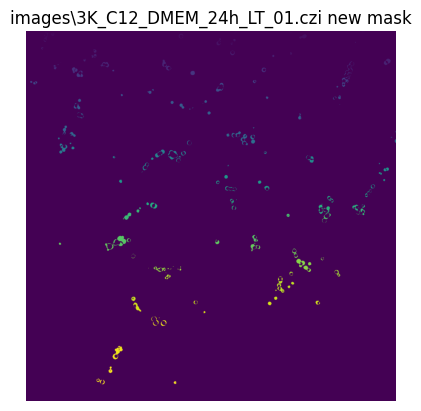

5917


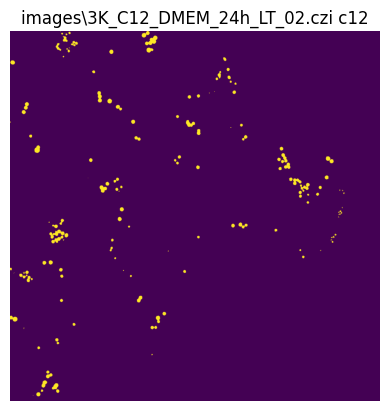

10794


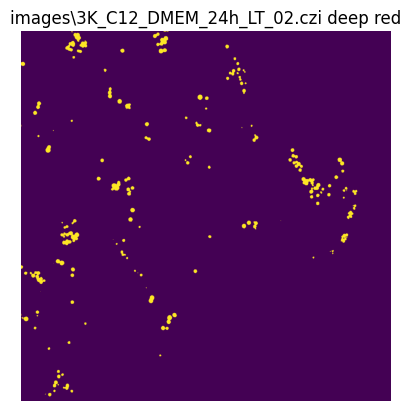

Object 1: Area = 12.0, Perimeter = 9.66, Circularity = 1.62
Object 2: Area = 67.0, Perimeter = 37.56, Circularity = 0.60
Object 3: Area = 27.0, Perimeter = 26.21, Circularity = 0.49
Object 4: Area = 722.0, Perimeter = 265.97, Circularity = 0.13
Object 5: Area = 41.0, Perimeter = 32.11, Circularity = 0.50
Object 6: Area = 19.0, Perimeter = 13.24, Circularity = 1.36
Object 7: Area = 26.0, Perimeter = 24.04, Circularity = 0.57
Object 8: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 9: Area = 17.0, Perimeter = 15.21, Circularity = 0.92
Object 10: Area = 5.0, Perimeter = 3.41, Circularity = 5.39
Object 11: Area = 18.0, Perimeter = 15.24, Circularity = 0.97
Object 12: Area = 5.0, Perimeter = 4.41, Circularity = 3.22
Object 13: Area = 11.0, Perimeter = 11.21, Circularity = 1.10
Object 14: Area = 7.0, Perimeter = 6.21, Circularity = 2.28
Object 15: Area = 271.0, Perimeter = 121.81, Circularity = 0.23
Object 16: Area = 61.0, Perimeter = 42.04, Circularity = 0.43
Object 17: Area = 75.0

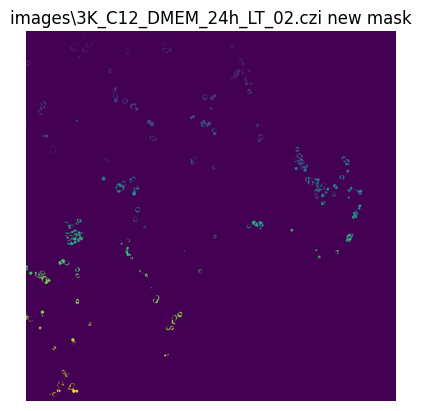

5247


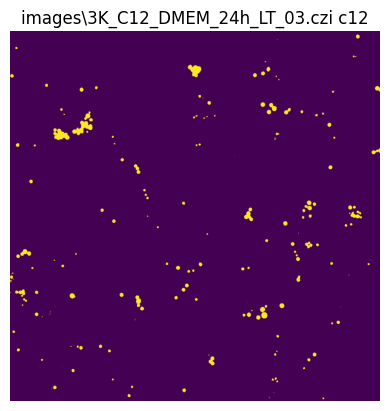

7927


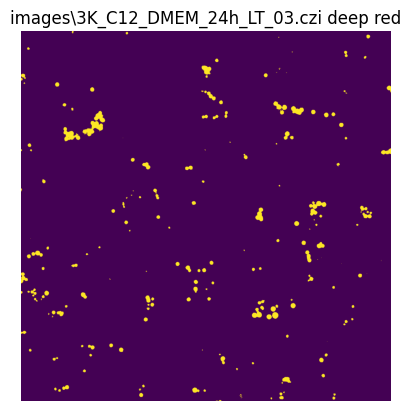

Object 1: Area = 34.0, Perimeter = 21.90, Circularity = 0.89
Object 2: Area = 50.0, Perimeter = 24.90, Circularity = 1.01
Object 3: Area = 30.0, Perimeter = 26.49, Circularity = 0.54
Object 4: Area = 22.0, Perimeter = 22.83, Circularity = 0.53
Object 5: Area = 7.0, Perimeter = 6.83, Circularity = 1.89
Object 6: Area = 3.0, Perimeter = 1.21, Circularity = 25.87
Object 7: Area = 54.0, Perimeter = 40.14, Circularity = 0.42
Object 8: Area = 150.0, Perimeter = 59.94, Circularity = 0.52
Object 9: Area = 7.0, Perimeter = 6.45, Circularity = 2.11
Object 10: Area = 12.0, Perimeter = 11.24, Circularity = 1.19
Object 11: Area = 44.0, Perimeter = 30.90, Circularity = 0.58
Object 12: Area = 96.0, Perimeter = 34.38, Circularity = 1.02
Object 13: Area = 12.0, Perimeter = 10.86, Circularity = 1.28
Object 14: Area = 340.0, Perimeter = 166.12, Circularity = 0.15
Object 15: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 16: Area = 126.0, Perimeter = 90.46, Circularity = 0.19
Object 17: Area = 1.

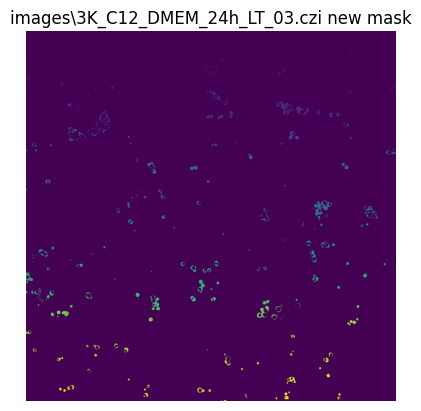

8994


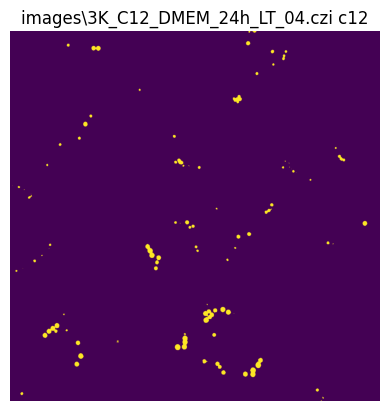

9158


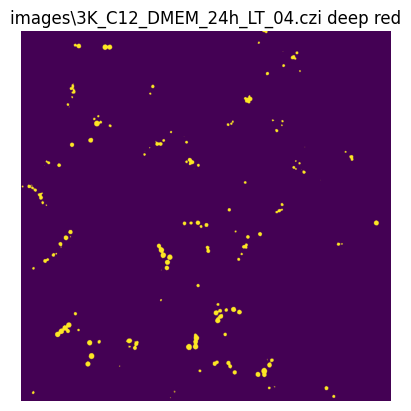

Object 1: Area = 28.0, Perimeter = 18.86, Circularity = 0.99
Object 2: Area = 12.0, Perimeter = 10.41, Circularity = 1.39
Object 3: Area = 16.0, Perimeter = 12.04, Circularity = 1.39
Object 4: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 5: Area = 104.0, Perimeter = 62.53, Circularity = 0.33
Object 6: Area = 172.0, Perimeter = 72.39, Circularity = 0.41
Object 7: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 8: Area = 145.0, Perimeter = 83.98, Circularity = 0.26
Object 9: Area = 28.0, Perimeter = 23.86, Circularity = 0.62
Object 10: Area = 50.0, Perimeter = 34.76, Circularity = 0.52
Object 11: Area = 95.0, Perimeter = 40.04, Circularity = 0.74
Object 12: Area = 29.0, Perimeter = 20.28, Circularity = 0.89
Object 13: Area = 41.0, Perimeter = 25.14, Circularity = 0.82
Object 14: Area = 38.0, Perimeter = 24.31, Circularity = 0.81
Object 15: Area = 110.0, Perimeter = 49.01, Circularity = 0.58
Object 16: Area = 8.0, Perimeter = 7.41, Circularity = 1.83
Object 17: Area = 6

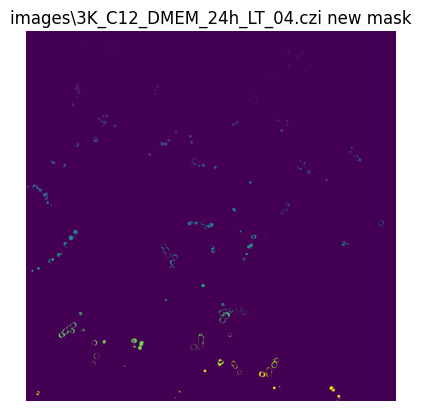

5974


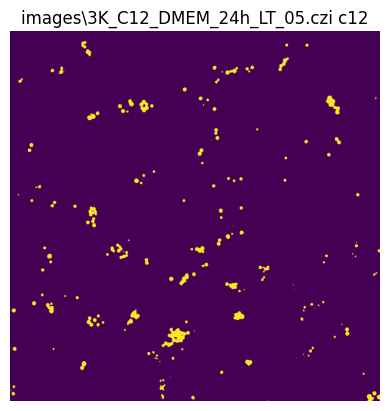

9241


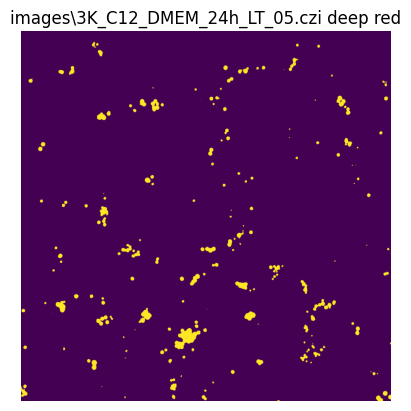

Object 1: Area = 204.0, Perimeter = 108.67, Circularity = 0.22
Object 2: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 3: Area = 10.0, Perimeter = 8.83, Circularity = 1.61
Object 4: Area = 14.0, Perimeter = 13.41, Circularity = 0.98
Object 5: Area = 44.0, Perimeter = 28.31, Circularity = 0.69
Object 6: Area = 7.0, Perimeter = 6.41, Circularity = 2.14
Object 7: Area = 33.0, Perimeter = 23.31, Circularity = 0.76
Object 8: Area = 68.0, Perimeter = 47.49, Circularity = 0.38
Object 9: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 10: Area = 27.0, Perimeter = 27.49, Circularity = 0.45
Object 11: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 12: Area = 3.0, Perimeter = 1.21, Circularity = 25.87
Object 13: Area = 132.0, Perimeter = 77.08, Circularity = 0.28
Object 14: Area = 66.0, Perimeter = 42.83, Circularity = 0.45
Object 15: Area = 7.0, Perimeter = 6.24, Circularity = 2.26
Object 16: Area = 45.0, Perimeter = 46.31, Circularity = 0.26
Object 17: Area = 17.0, Pe

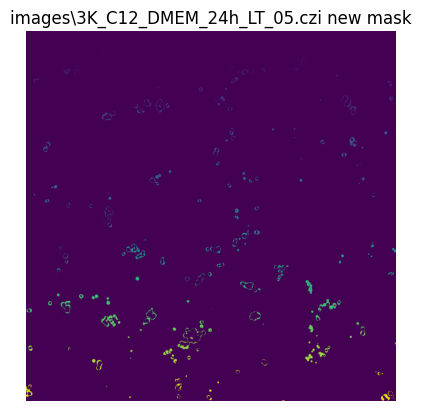

8215


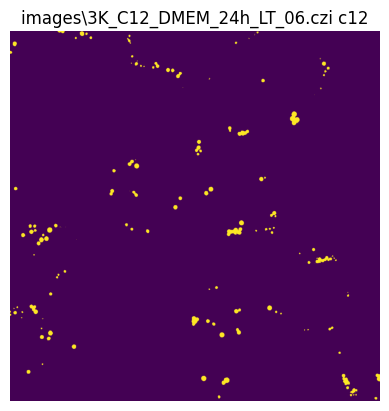

8457


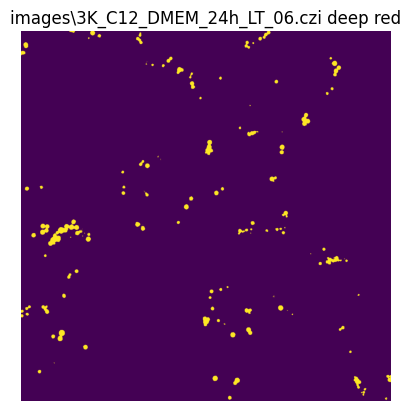

Object 1: Area = 18.0, Perimeter = 16.41, Circularity = 0.84
Object 2: Area = 25.0, Perimeter = 18.04, Circularity = 0.97
Object 3: Area = 39.0, Perimeter = 32.66, Circularity = 0.46
Object 4: Area = 245.0, Perimeter = 109.95, Circularity = 0.25
Object 5: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 6: Area = 62.0, Perimeter = 37.76, Circularity = 0.55
Object 7: Area = 205.0, Perimeter = 77.36, Circularity = 0.43
Object 8: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 9: Area = 28.0, Perimeter = 18.45, Circularity = 1.03
Object 10: Area = 8.0, Perimeter = 7.21, Circularity = 1.94
Object 11: Area = 37.0, Perimeter = 19.66, Circularity = 1.20
Object 12: Area = 95.0, Perimeter = 50.01, Circularity = 0.48
Object 13: Area = 101.0, Perimeter = 46.21, Circularity = 0.59
Object 14: Area = 21.0, Perimeter = 15.90, Circularity = 1.04
Object 15: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 16: Area = 203.0, Perimeter = 94.67, Circularity = 0.28
Object 17: Area = 50

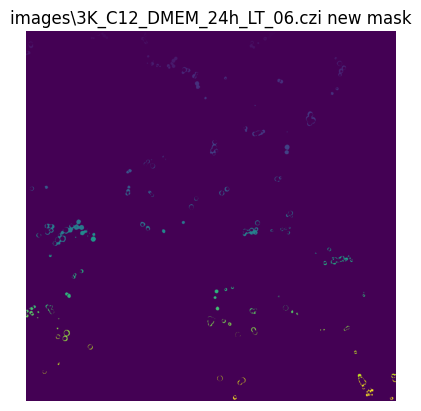

2384


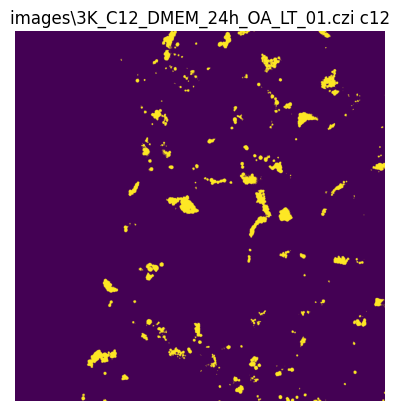

2893
bleedthrough detected images\3K_C12_DMEM_24h_OA_LT_01.czi


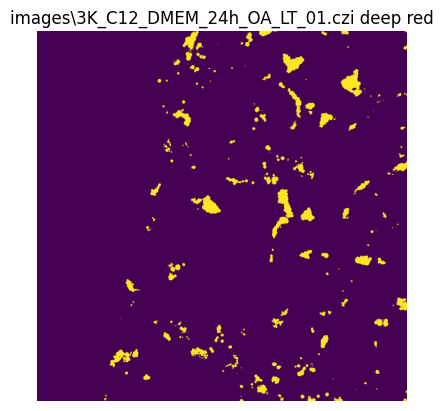

Object 1: Area = 29.0, Perimeter = 26.11, Circularity = 0.53
Object 2: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 3: Area = 5.0, Perimeter = 3.00, Circularity = 6.98
Object 4: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 5: Area = 135.0, Perimeter = 112.60, Circularity = 0.13
Object 6: Area = 5.0, Perimeter = 3.62, Circularity = 4.79
Object 7: Area = 8.0, Perimeter = 7.21, Circularity = 1.94
Object 8: Area = 155.0, Perimeter = 65.60, Circularity = 0.45
Object 9: Area = 13.0, Perimeter = 14.07, Circularity = 0.83
Object 10: Area = 6.0, Perimeter = 5.62, Circularity = 2.39
Object 11: Area = 23.0, Perimeter = 17.66, Circularity = 0.93
Object 12: Area = 3.0, Perimeter = 3.41, Circularity = 3.23
Object 13: Area = 13.0, Perimeter = 13.45, Circularity = 0.90
Object 14: Area = 7.0, Perimeter = 7.66, Circularity = 1.50
Object 15: Area = 12.0, Perimeter = 11.41, Circularity = 1.16
Object 16: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 17: Area = 1.0, Perimeter

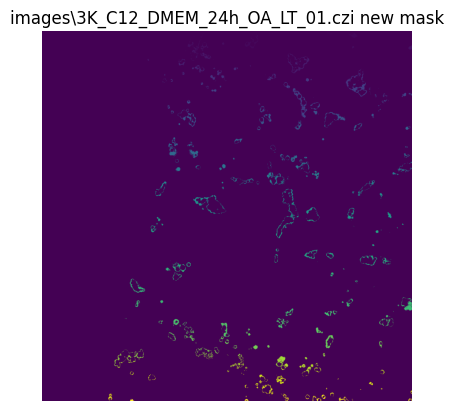

2149


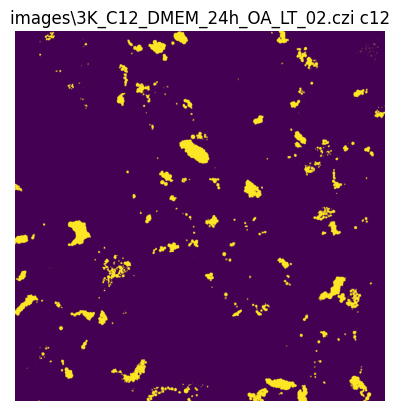

5446


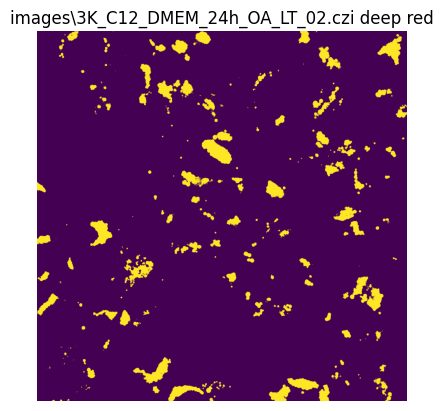

Object 1: Area = 221.0, Perimeter = 146.54, Circularity = 0.13
Object 2: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 3: Area = 75.0, Perimeter = 61.70, Circularity = 0.25
Object 4: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 5: Area = 143.0, Perimeter = 87.18, Circularity = 0.24
Object 6: Area = 10.0, Perimeter = 11.49, Circularity = 0.95
Object 7: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 8: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 9: Area = 5.0, Perimeter = 3.41, Circularity = 5.39
Object 10: Area = 23.0, Perimeter = 15.07, Circularity = 1.27
Object 11: Area = 4.0, Perimeter = 2.83, Circularity = 6.28
Object 12: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 13: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 14: Area = 68.0, Perimeter = 43.42, Circularity = 0.45
Object 15: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 16: Area = 97.0, Perimeter = 64.94, Circularity = 0.29
Object 17: Area = 1.0, Perimeter

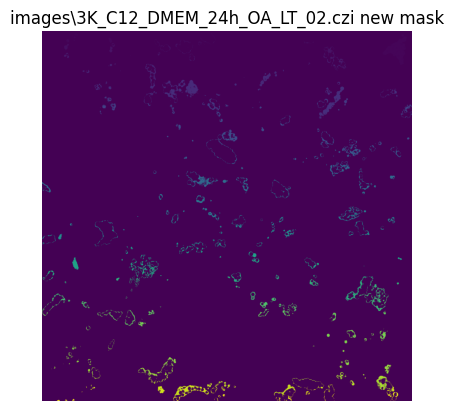

2551


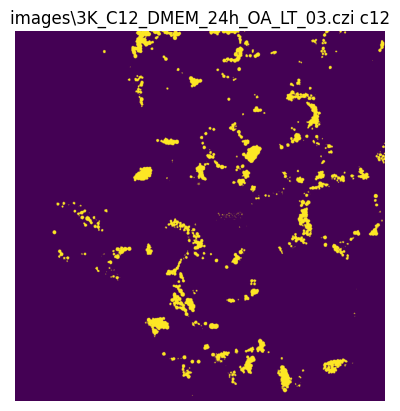

3220


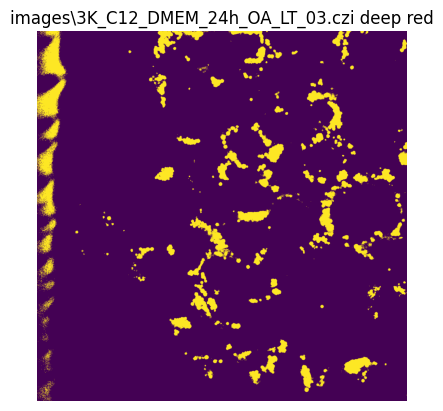

Object 1: Area = 23.0, Perimeter = 21.90, Circularity = 0.60
Object 2: Area = 4.0, Perimeter = 3.41, Circularity = 4.31
Object 3: Area = 12540.0, Perimeter = 2727.10, Circularity = 0.02
Object 4: Area = 11.0, Perimeter = 11.24, Circularity = 1.09
Object 5: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 6: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 7: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 8: Area = 139.0, Perimeter = 111.01, Circularity = 0.14
Object 9: Area = 173.0, Perimeter = 137.91, Circularity = 0.11
Object 10: Area = 12.0, Perimeter = 11.04, Circularity = 1.24
Object 11: Area = 31.0, Perimeter = 22.86, Circularity = 0.75
Object 12: Area = 24.0, Perimeter = 19.07, Circularity = 0.83
Object 13: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 14: Area = 11.0, Perimeter = 9.41, Circularity = 1.56
Object 15: Area = 10.0, Perimeter = 9.62, Circularity = 1.36
Object 16: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 17: Area = 37.0

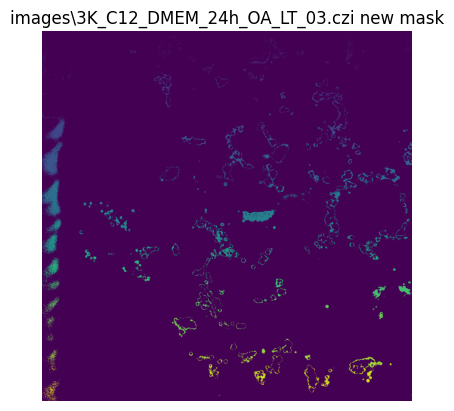

2612


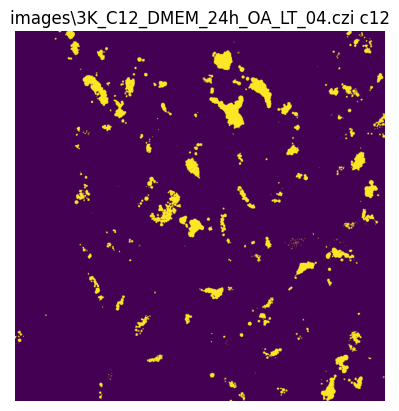

5508


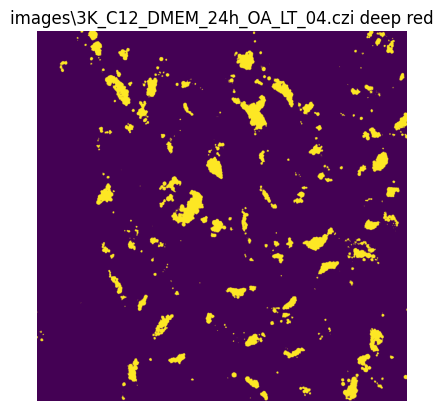

Object 1: Area = 136.0, Perimeter = 87.77, Circularity = 0.22
Object 2: Area = 13.0, Perimeter = 11.66, Circularity = 1.20
Object 3: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 4: Area = 13.0, Perimeter = 12.62, Circularity = 1.03
Object 5: Area = 10.0, Perimeter = 8.21, Circularity = 1.87
Object 6: Area = 46.0, Perimeter = 23.73, Circularity = 1.03
Object 7: Area = 3.0, Perimeter = 1.00, Circularity = 37.70
Object 8: Area = 195.0, Perimeter = 96.74, Circularity = 0.26
Object 9: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 10: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 11: Area = 139.0, Perimeter = 85.43, Circularity = 0.24
Object 12: Area = 3.0, Perimeter = 1.21, Circularity = 25.87
Object 13: Area = 3.0, Perimeter = 1.00, Circularity = 37.70
Object 14: Area = 29.0, Perimeter = 20.69, Circularity = 0.85
Object 15: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 16: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 17: Area = 1.0, Perim

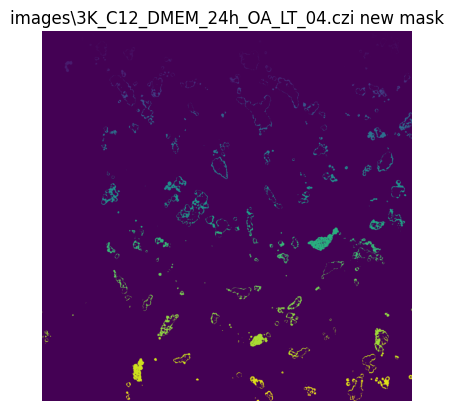

2860


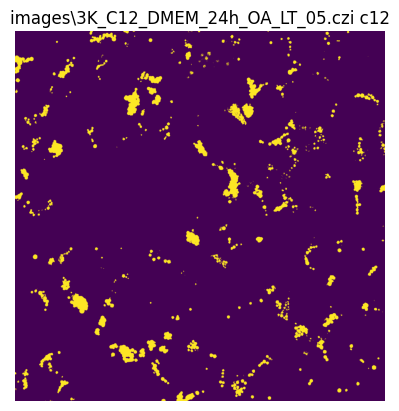

6241


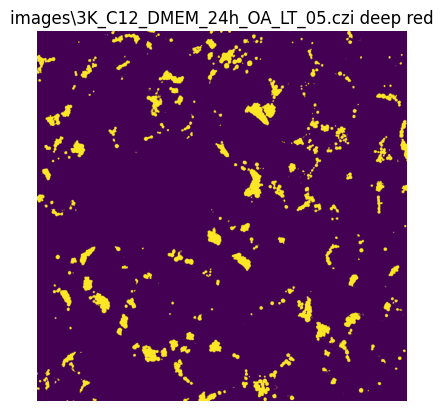

Object 1: Area = 3.0, Perimeter = 1.21, Circularity = 25.87
Object 2: Area = 3.0, Perimeter = 1.00, Circularity = 37.70
Object 3: Area = 134.0, Perimeter = 72.87, Circularity = 0.32
Object 4: Area = 11.0, Perimeter = 9.62, Circularity = 1.49
Object 5: Area = 67.0, Perimeter = 34.01, Circularity = 0.73
Object 6: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 7: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 8: Area = 17.0, Perimeter = 15.41, Circularity = 0.90
Object 9: Area = 42.0, Perimeter = 23.66, Circularity = 0.94
Object 10: Area = 7.0, Perimeter = 6.62, Circularity = 2.01
Object 11: Area = 35.0, Perimeter = 29.49, Circularity = 0.51
Object 12: Area = 41.0, Perimeter = 21.90, Circularity = 1.07
Object 13: Area = 6.0, Perimeter = 6.41, Circularity = 1.83
Object 14: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 15: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 16: Area = 84.0, Perimeter = 60.76, Circularity = 0.29
Object 17: Area = 111.0, Perime

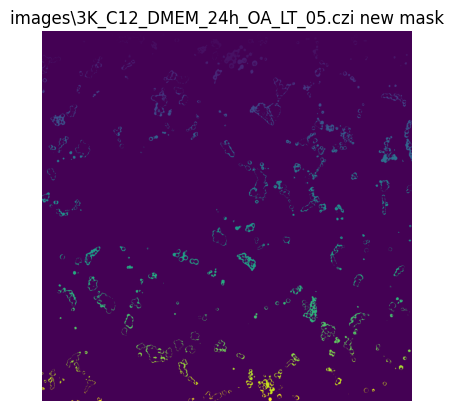

3655


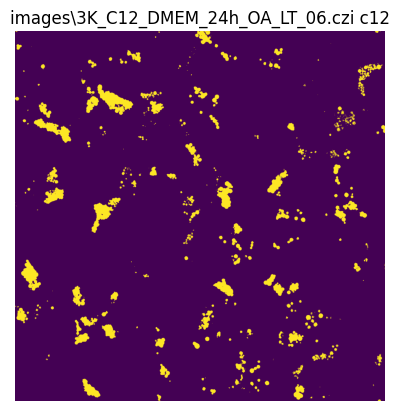

6319


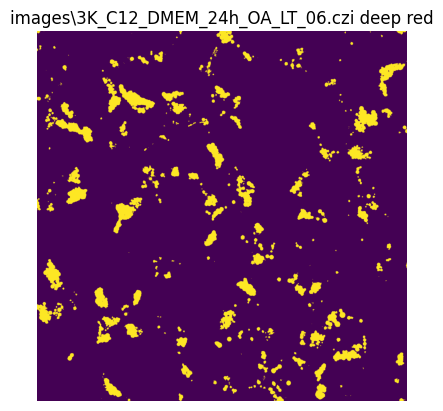

Object 1: Area = 50.0, Perimeter = 29.14, Circularity = 0.74
Object 2: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 3: Area = 52.0, Perimeter = 36.73, Circularity = 0.48
Object 4: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 5: Area = 5.0, Perimeter = 5.21, Circularity = 2.32
Object 6: Area = 31.0, Perimeter = 29.49, Circularity = 0.45
Object 7: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 8: Area = 3.0, Perimeter = 3.41, Circularity = 3.23
Object 9: Area = 128.0, Perimeter = 62.21, Circularity = 0.42
Object 10: Area = 9.0, Perimeter = 5.66, Circularity = 3.53
Object 11: Area = 86.0, Perimeter = 55.04, Circularity = 0.36
Object 12: Area = 20.0, Perimeter = 15.24, Circularity = 1.08
Object 13: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 14: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 15: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 16: Area = 35.0, Perimeter = 32.11, Circularity = 0.43
Object 17: Area = 1.0, Perimeter =

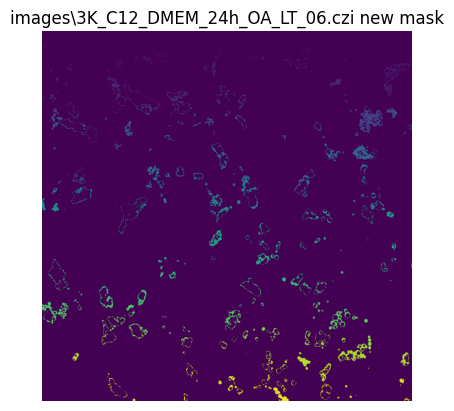

9163


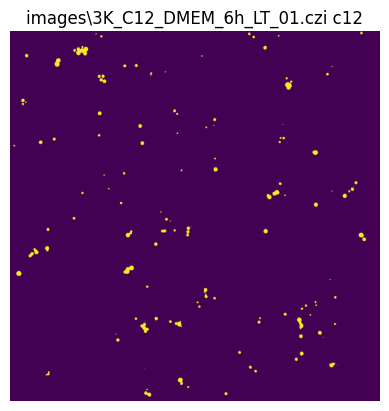

6579


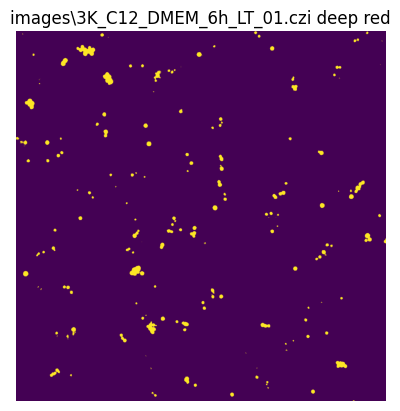

Object 1: Area = 70.0, Perimeter = 48.38, Circularity = 0.38
Object 2: Area = 4.0, Perimeter = 4.41, Circularity = 2.58
Object 3: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 4: Area = 9.0, Perimeter = 7.00, Circularity = 2.31
Object 5: Area = 85.0, Perimeter = 38.52, Circularity = 0.72
Object 6: Area = 3.0, Perimeter = 3.41, Circularity = 3.23
Object 7: Area = 6.0, Perimeter = 6.24, Circularity = 1.93
Object 8: Area = 32.0, Perimeter = 23.69, Circularity = 0.72
Object 9: Area = 22.0, Perimeter = 15.90, Circularity = 1.09
Object 10: Area = 44.0, Perimeter = 21.66, Circularity = 1.18
Object 11: Area = 20.0, Perimeter = 14.07, Circularity = 1.27
Object 12: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 13: Area = 114.0, Perimeter = 54.25, Circularity = 0.49
Object 14: Area = 5.0, Perimeter = 4.24, Circularity = 3.49
Object 15: Area = 349.0, Perimeter = 170.40, Circularity = 0.15
Object 16: Area = 42.0, Perimeter = 23.07, Circularity = 0.99
Object 17: Area = 20.0, Peri

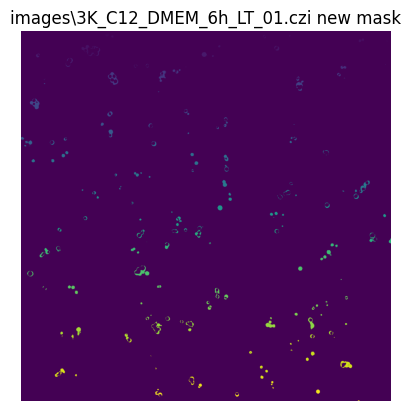

10577


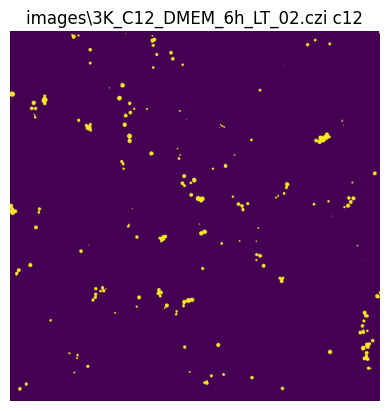

8822


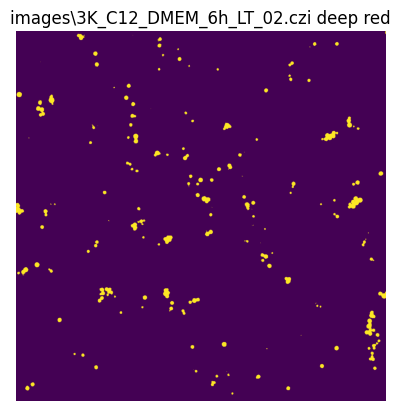

Object 1: Area = 3.0, Perimeter = 1.00, Circularity = 37.70
Object 2: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 3: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 4: Area = 7.0, Perimeter = 6.41, Circularity = 2.14
Object 5: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 6: Area = 207.0, Perimeter = 126.08, Circularity = 0.16
Object 7: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 8: Area = 21.0, Perimeter = 13.66, Circularity = 1.41
Object 9: Area = 7.0, Perimeter = 6.41, Circularity = 2.14
Object 10: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 11: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 12: Area = 107.0, Perimeter = 67.25, Circularity = 0.30
Object 13: Area = 62.0, Perimeter = 27.31, Circularity = 1.04
Object 14: Area = 63.0, Perimeter = 36.38, Circularity = 0.60
Object 15: Area = 52.0, Perimeter = 32.97, Circularity = 0.60
Object 16: Area = 20.0, Perimeter = 18.24, Circularity = 0.76
Object 17: Area = 35.0, Perimet

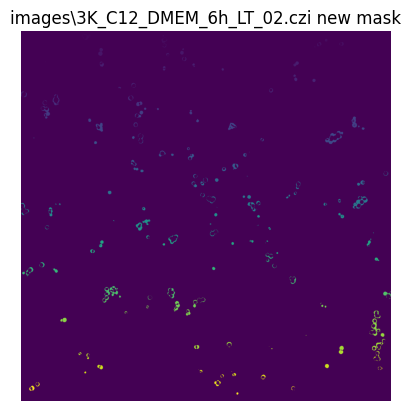

15814


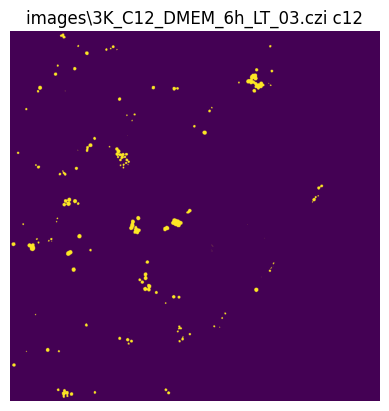

6424


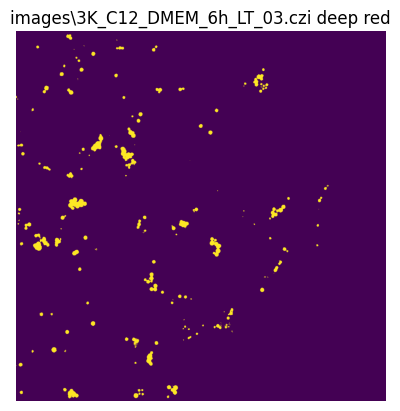

Object 1: Area = 35.0, Perimeter = 28.14, Circularity = 0.56
Object 2: Area = 8.0, Perimeter = 7.41, Circularity = 1.83
Object 3: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 4: Area = 73.0, Perimeter = 51.04, Circularity = 0.35
Object 5: Area = 7.0, Perimeter = 5.41, Circularity = 3.00
Object 6: Area = 25.0, Perimeter = 20.69, Circularity = 0.73
Object 7: Area = 44.0, Perimeter = 22.49, Circularity = 1.09
Object 8: Area = 177.0, Perimeter = 93.77, Circularity = 0.25
Object 9: Area = 54.0, Perimeter = 27.14, Circularity = 0.92
Object 10: Area = 67.0, Perimeter = 28.73, Circularity = 1.02
Object 11: Area = 46.0, Perimeter = 22.73, Circularity = 1.12
Object 12: Area = 100.0, Perimeter = 36.97, Circularity = 0.92
Object 13: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 14: Area = 4.0, Perimeter = 3.41, Circularity = 4.31
Object 15: Area = 19.0, Perimeter = 17.24, Circularity = 0.80
Object 16: Area = 45.0, Perimeter = 34.76, Circularity = 0.47
Object 17: Area = 33.0, P

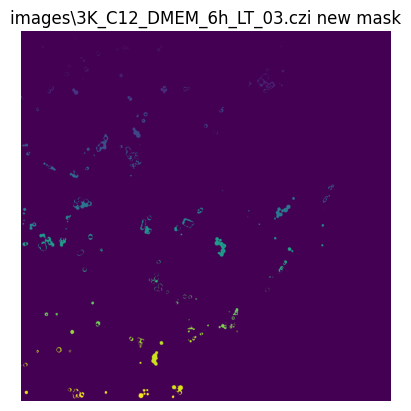

8889


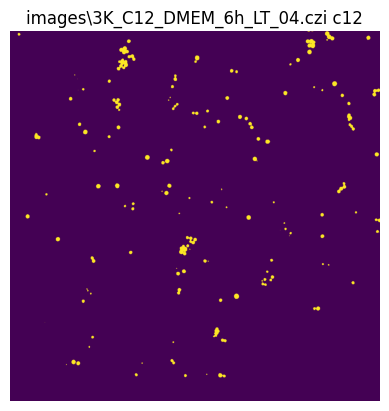

9096


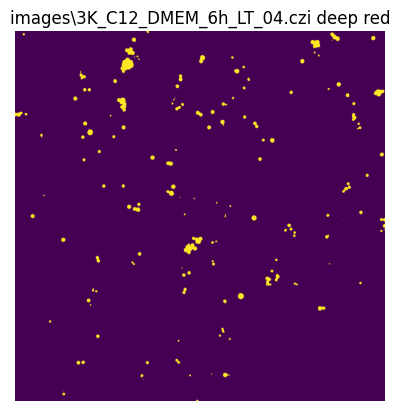

Object 1: Area = 47.0, Perimeter = 25.90, Circularity = 0.88
Object 2: Area = 12.0, Perimeter = 10.62, Circularity = 1.34
Object 3: Area = 6.0, Perimeter = 4.00, Circularity = 4.71
Object 4: Area = 60.0, Perimeter = 41.11, Circularity = 0.45
Object 5: Area = 3.0, Perimeter = 1.00, Circularity = 37.70
Object 6: Area = 14.0, Perimeter = 13.62, Circularity = 0.95
Object 7: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 8: Area = 4.0, Perimeter = 2.41, Circularity = 8.62
Object 9: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 10: Area = 4.0, Perimeter = 2.00, Circularity = 12.57
Object 11: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 12: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 13: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 14: Area = 8.0, Perimeter = 7.41, Circularity = 1.83
Object 15: Area = 33.0, Perimeter = 28.07, Circularity = 0.53
Object 16: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 17: Area = 80.0, Perimeter = 4

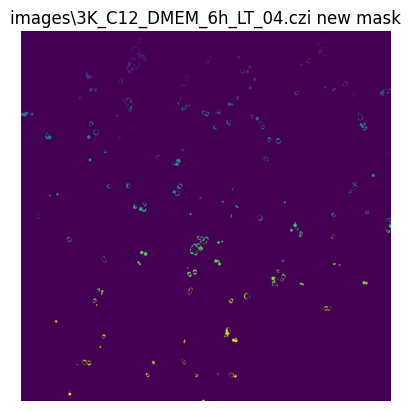

10814


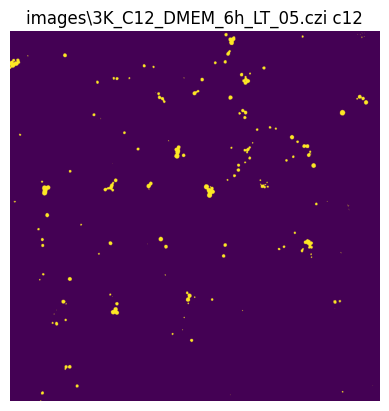

9167


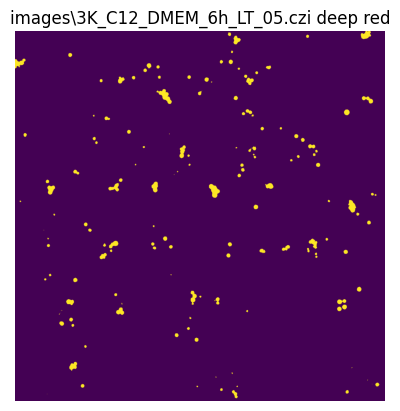

Object 1: Area = 579.0, Perimeter = 138.88, Circularity = 0.38
Object 2: Area = 110.0, Perimeter = 61.63, Circularity = 0.36
Object 3: Area = 38.0, Perimeter = 34.90, Circularity = 0.39
Object 4: Area = 100.0, Perimeter = 56.66, Circularity = 0.39
Object 5: Area = 28.0, Perimeter = 24.62, Circularity = 0.58
Object 6: Area = 68.0, Perimeter = 42.56, Circularity = 0.47
Object 7: Area = 183.0, Perimeter = 71.84, Circularity = 0.45
Object 8: Area = 20.0, Perimeter = 18.21, Circularity = 0.76
Object 9: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 10: Area = 3.0, Perimeter = 1.00, Circularity = 37.70
Object 11: Area = 9.0, Perimeter = 6.83, Circularity = 2.43
Object 12: Area = 4.0, Perimeter = 2.62, Circularity = 7.32
Object 13: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 14: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 15: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 16: Area = 23.0, Perimeter = 17.66, Circularity = 0.93
Object 17: Area = 25.0, P

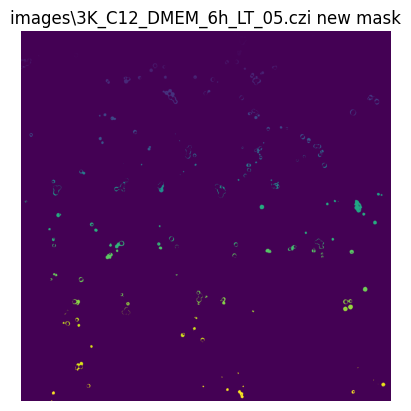

11951


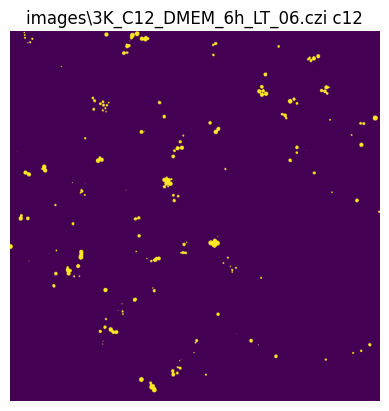

9082


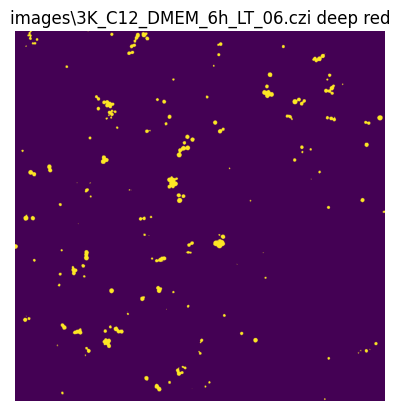

Object 1: Area = 157.0, Perimeter = 112.25, Circularity = 0.16
Object 2: Area = 3.0, Perimeter = 1.00, Circularity = 37.70
Object 3: Area = 94.0, Perimeter = 46.25, Circularity = 0.55
Object 4: Area = 3.0, Perimeter = 3.41, Circularity = 3.23
Object 5: Area = 142.0, Perimeter = 51.21, Circularity = 0.68
Object 6: Area = 55.0, Perimeter = 40.97, Circularity = 0.41
Object 7: Area = 5.0, Perimeter = 3.21, Circularity = 6.11
Object 8: Area = 25.0, Perimeter = 23.07, Circularity = 0.59
Object 9: Area = 3.0, Perimeter = 1.41, Circularity = 18.85
Object 10: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 11: Area = 260.0, Perimeter = 88.01, Circularity = 0.42
Object 12: Area = 88.0, Perimeter = 61.70, Circularity = 0.29
Object 13: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 14: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 15: Area = 8.0, Perimeter = 8.62, Circularity = 1.35
Object 16: Area = 26.0, Perimeter = 19.49, Circularity = 0.86
Object 17: Area = 78.0, Per

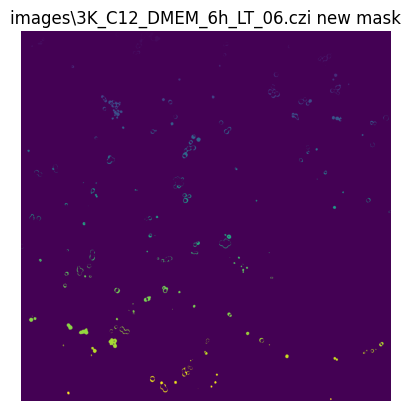

13912


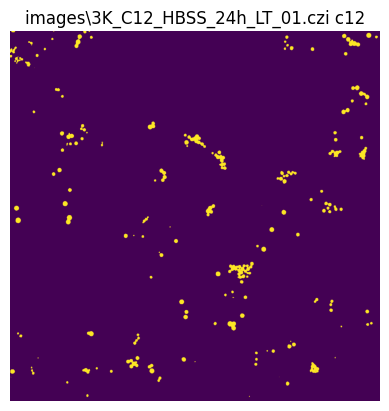

6388


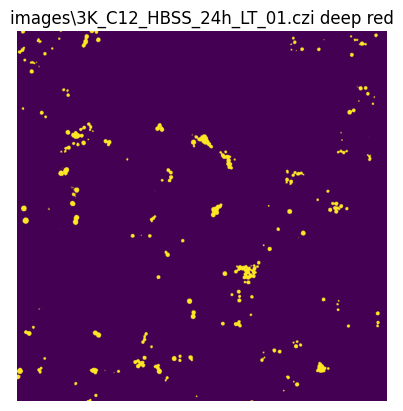

Object 1: Area = 111.0, Perimeter = 53.97, Circularity = 0.48
Object 2: Area = 4.0, Perimeter = 3.41, Circularity = 4.31
Object 3: Area = 5.0, Perimeter = 5.41, Circularity = 2.14
Object 4: Area = 8.0, Perimeter = 7.21, Circularity = 1.94
Object 5: Area = 8.0, Perimeter = 7.41, Circularity = 1.83
Object 6: Area = 75.0, Perimeter = 37.56, Circularity = 0.67
Object 7: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 8: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 9: Area = 4.0, Perimeter = 2.21, Circularity = 10.32
Object 10: Area = 106.0, Perimeter = 83.46, Circularity = 0.19
Object 11: Area = 114.0, Perimeter = 66.01, Circularity = 0.33
Object 12: Area = 3.0, Perimeter = 1.00, Circularity = 37.70
Object 13: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 14: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 15: Area = 47.0, Perimeter = 32.59, Circularity = 0.56
Object 16: Area = 188.0, Perimeter = 74.08, Circularity = 0.43
Object 17: Area = 64.0, Perimet

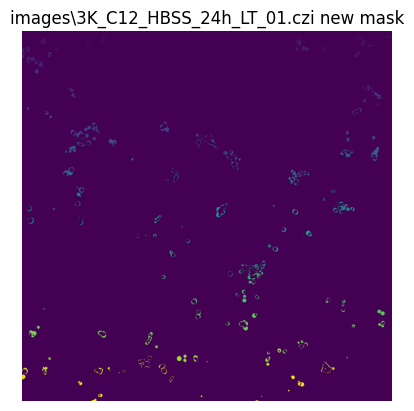

12756


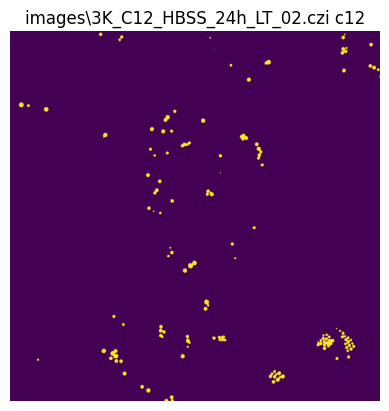

11479


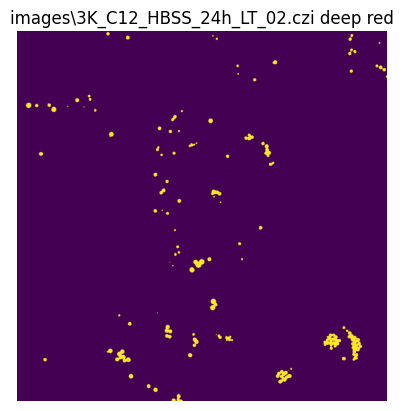

Object 1: Area = 23.0, Perimeter = 21.04, Circularity = 0.65
Object 2: Area = 21.0, Perimeter = 19.04, Circularity = 0.73
Object 3: Area = 96.0, Perimeter = 66.87, Circularity = 0.27
Object 4: Area = 21.0, Perimeter = 16.45, Circularity = 0.98
Object 5: Area = 26.0, Perimeter = 16.62, Circularity = 1.18
Object 6: Area = 45.0, Perimeter = 32.28, Circularity = 0.54
Object 7: Area = 10.0, Perimeter = 8.62, Circularity = 1.69
Object 8: Area = 28.0, Perimeter = 20.11, Circularity = 0.87
Object 9: Area = 43.0, Perimeter = 22.73, Circularity = 1.05
Object 10: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 11: Area = 51.0, Perimeter = 30.73, Circularity = 0.68
Object 12: Area = 119.0, Perimeter = 49.25, Circularity = 0.62
Object 13: Area = 288.0, Perimeter = 156.16, Circularity = 0.15
Object 14: Area = 3.0, Perimeter = 3.41, Circularity = 3.23
Object 15: Area = 17.0, Perimeter = 17.66, Circularity = 0.69
Object 16: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 17: Area = 38.

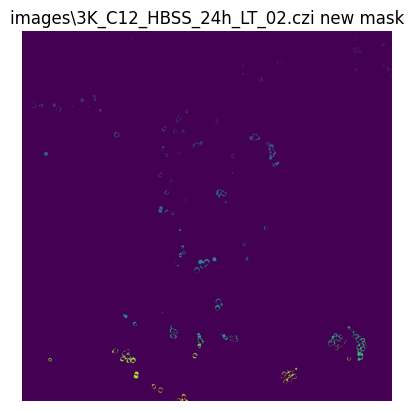

11494


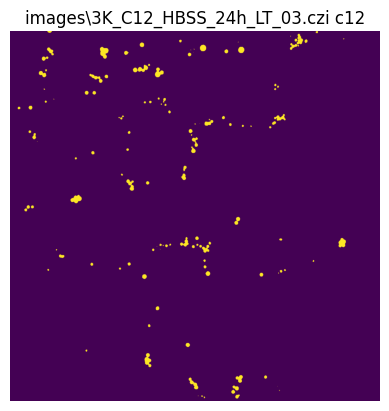

15514


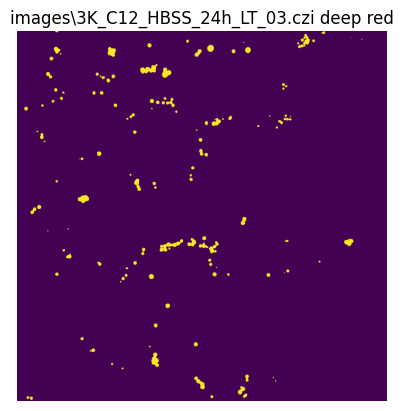

Object 1: Area = 32.0, Perimeter = 28.86, Circularity = 0.48
Object 2: Area = 4.0, Perimeter = 2.21, Circularity = 10.32
Object 3: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 4: Area = 41.0, Perimeter = 31.11, Circularity = 0.53
Object 5: Area = 5.0, Perimeter = 3.41, Circularity = 5.39
Object 6: Area = 11.0, Perimeter = 9.83, Circularity = 1.43
Object 7: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 8: Area = 5.0, Perimeter = 5.21, Circularity = 2.32
Object 9: Area = 96.0, Perimeter = 77.38, Circularity = 0.20
Object 10: Area = 11.0, Perimeter = 11.04, Circularity = 1.14
Object 11: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 12: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 13: Area = 25.0, Perimeter = 18.66, Circularity = 0.90
Object 14: Area = 9.0, Perimeter = 8.24, Circularity = 1.66
Object 15: Area = 5.0, Perimeter = 3.00, Circularity = 6.98
Object 16: Area = 41.0, Perimeter = 35.14, Circularity = 0.42
Object 17: Area = 2.0, Perimeter = 

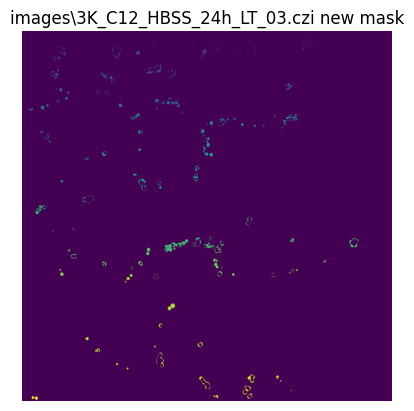

15418


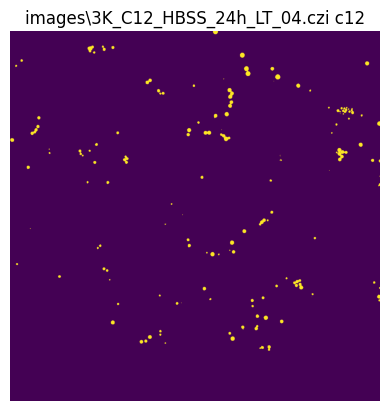

16907


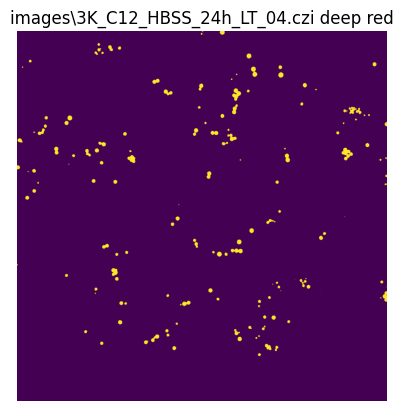

Object 1: Area = 8.0, Perimeter = 6.21, Circularity = 2.61
Object 2: Area = 6.0, Perimeter = 5.21, Circularity = 2.78
Object 3: Area = 26.0, Perimeter = 25.45, Circularity = 0.50
Object 4: Area = 26.0, Perimeter = 16.90, Circularity = 1.14
Object 5: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 6: Area = 407.0, Perimeter = 158.40, Circularity = 0.20
Object 7: Area = 56.0, Perimeter = 48.97, Circularity = 0.29
Object 8: Area = 18.0, Perimeter = 16.41, Circularity = 0.84
Object 9: Area = 26.0, Perimeter = 18.45, Circularity = 0.96
Object 10: Area = 4.0, Perimeter = 2.41, Circularity = 8.62
Object 11: Area = 10.0, Perimeter = 8.41, Circularity = 1.77
Object 12: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 13: Area = 31.0, Perimeter = 20.90, Circularity = 0.89
Object 14: Area = 31.0, Perimeter = 19.66, Circularity = 1.01
Object 15: Area = 45.0, Perimeter = 30.69, Circularity = 0.60
Object 16: Area = 41.0, Perimeter = 33.73, Circularity = 0.45
Object 17: Area = 84.0, Pe

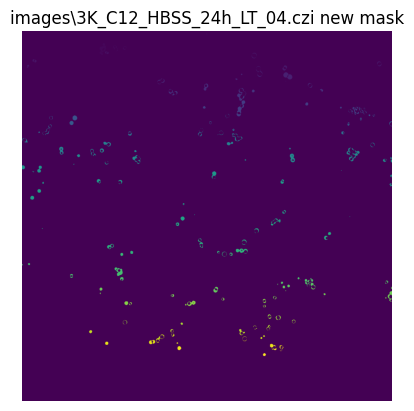

12022


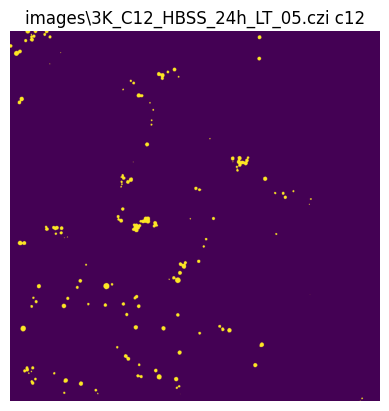

18969


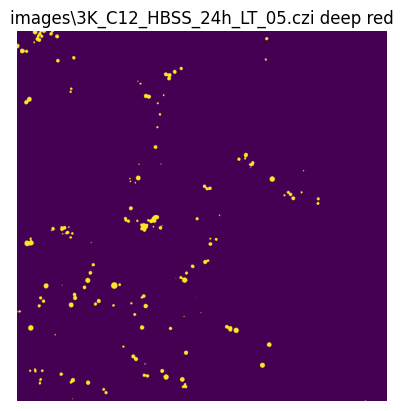

Object 1: Area = 4.0, Perimeter = 2.00, Circularity = 12.57
Object 2: Area = 47.0, Perimeter = 33.11, Circularity = 0.54
Object 3: Area = 136.0, Perimeter = 77.32, Circularity = 0.29
Object 4: Area = 30.0, Perimeter = 19.86, Circularity = 0.96
Object 5: Area = 99.0, Perimeter = 60.66, Circularity = 0.34
Object 6: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 7: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 8: Area = 14.0, Perimeter = 13.45, Circularity = 0.97
Object 9: Area = 49.0, Perimeter = 38.35, Circularity = 0.42
Object 10: Area = 68.0, Perimeter = 45.66, Circularity = 0.41
Object 11: Area = 25.0, Perimeter = 20.28, Circularity = 0.76
Object 12: Area = 102.0, Perimeter = 56.25, Circularity = 0.41
Object 13: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 14: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 15: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 16: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 17: Area = 105.0, Per

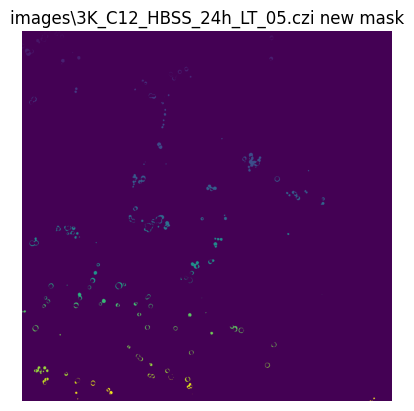

13019


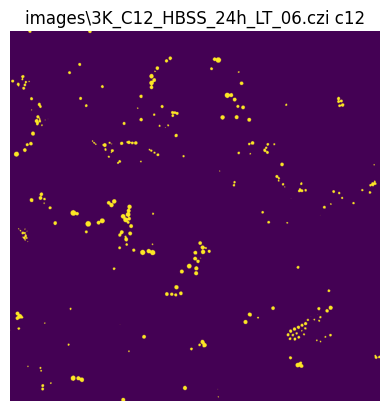

18741


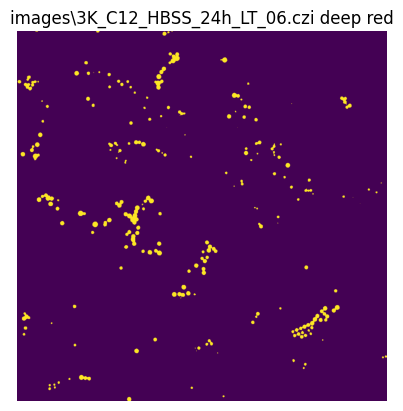

Object 1: Area = 32.0, Perimeter = 22.49, Circularity = 0.80
Object 2: Area = 26.0, Perimeter = 20.86, Circularity = 0.75
Object 3: Area = 10.0, Perimeter = 8.83, Circularity = 1.61
Object 4: Area = 8.0, Perimeter = 8.41, Circularity = 1.42
Object 5: Area = 37.0, Perimeter = 21.31, Circularity = 1.02
Object 6: Area = 132.0, Perimeter = 40.38, Circularity = 1.02
Object 7: Area = 619.0, Perimeter = 237.27, Circularity = 0.14
Object 8: Area = 59.0, Perimeter = 37.38, Circularity = 0.53
Object 9: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 10: Area = 45.0, Perimeter = 34.69, Circularity = 0.47
Object 11: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 12: Area = 6.0, Perimeter = 5.83, Circularity = 2.22
Object 13: Area = 114.0, Perimeter = 60.25, Circularity = 0.39
Object 14: Area = 11.0, Perimeter = 10.21, Circularity = 1.33
Object 15: Area = 185.0, Perimeter = 86.18, Circularity = 0.31
Object 16: Area = 65.0, Perimeter = 26.73, Circularity = 1.14
Object 17: Area = 106

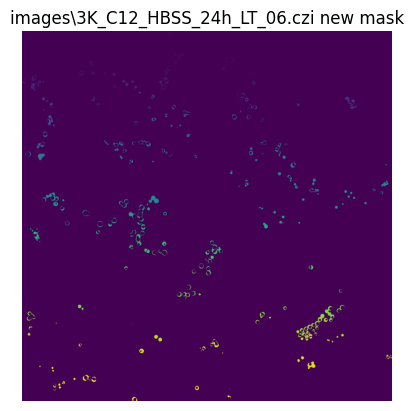

20519


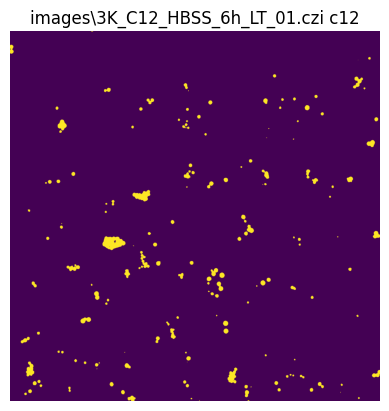

5683


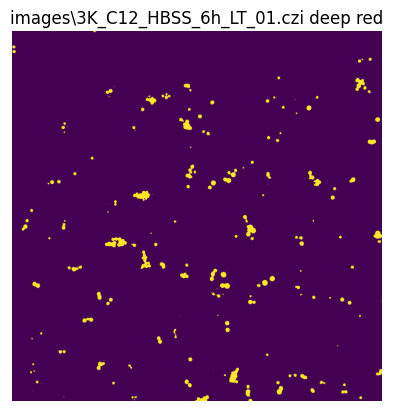

Object 1: Area = 19.0, Perimeter = 13.04, Circularity = 1.41
Object 2: Area = 105.0, Perimeter = 79.91, Circularity = 0.21
Object 3: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 4: Area = 5.0, Perimeter = 3.62, Circularity = 4.79
Object 5: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 6: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 7: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 8: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 9: Area = 92.0, Perimeter = 50.80, Circularity = 0.45
Object 10: Area = 21.0, Perimeter = 15.49, Circularity = 1.10
Object 11: Area = 85.0, Perimeter = 35.73, Circularity = 0.84
Object 12: Area = 152.0, Perimeter = 57.11, Circularity = 0.59
Object 13: Area = 122.0, Perimeter = 74.15, Circularity = 0.28
Object 14: Area = 256.0, Perimeter = 131.40, Circularity = 0.19
Object 15: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 16: Area = 76.0, Perimeter = 33.80, Circularity = 0.84
Object 17: Area = 2.0, Per

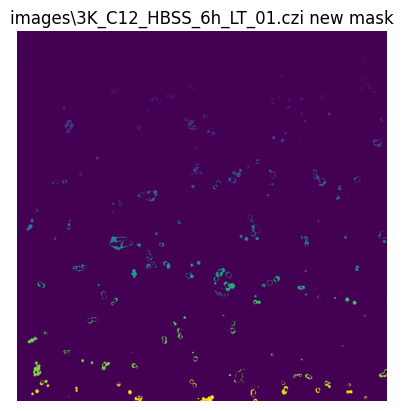

21707


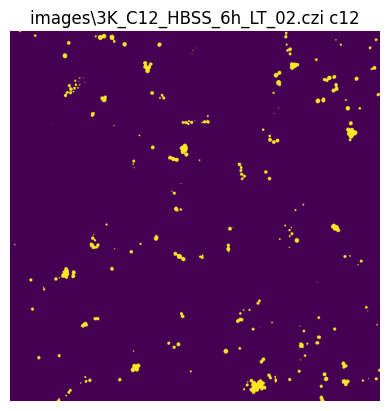

5425


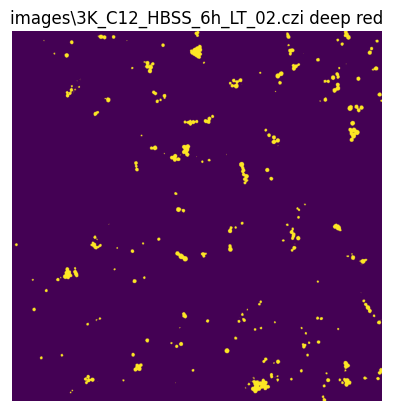

Object 1: Area = 21.0, Perimeter = 15.45, Circularity = 1.11
Object 2: Area = 203.0, Perimeter = 58.53, Circularity = 0.74
Object 3: Area = 395.0, Perimeter = 86.77, Circularity = 0.66
Object 4: Area = 26.0, Perimeter = 19.28, Circularity = 0.88
Object 5: Area = 30.0, Perimeter = 22.90, Circularity = 0.72
Object 6: Area = 194.0, Perimeter = 110.91, Circularity = 0.20
Object 7: Area = 55.0, Perimeter = 25.31, Circularity = 1.08
Object 8: Area = 52.0, Perimeter = 34.35, Circularity = 0.55
Object 9: Area = 175.0, Perimeter = 99.98, Circularity = 0.22
Object 10: Area = 8.0, Perimeter = 8.24, Circularity = 1.48
Object 11: Area = 14.0, Perimeter = 12.45, Circularity = 1.14
Object 12: Area = 37.0, Perimeter = 24.11, Circularity = 0.80
Object 13: Area = 46.0, Perimeter = 34.94, Circularity = 0.47
Object 14: Area = 97.0, Perimeter = 54.42, Circularity = 0.41
Object 15: Area = 8.0, Perimeter = 9.04, Circularity = 1.23
Object 16: Area = 44.0, Perimeter = 30.73, Circularity = 0.59
Object 17: Area 

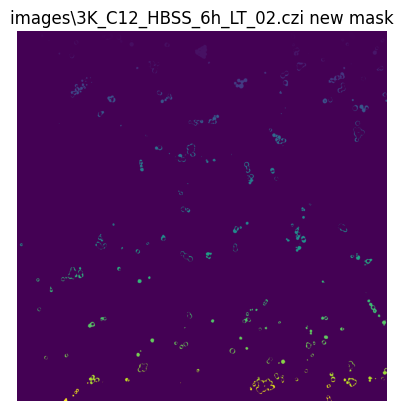

18654


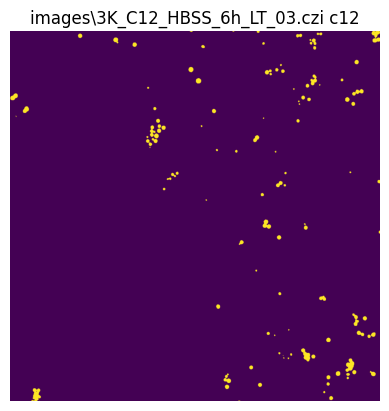

7221


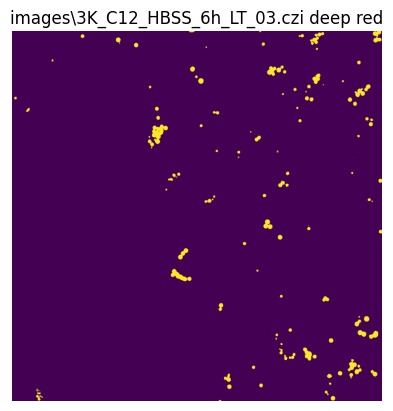

Object 1: Area = 43.0, Perimeter = 27.49, Circularity = 0.72
Object 2: Area = 11.0, Perimeter = 10.21, Circularity = 1.33
Object 3: Area = 29.0, Perimeter = 20.11, Circularity = 0.90
Object 4: Area = 7.0, Perimeter = 6.21, Circularity = 2.28
Object 5: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 6: Area = 83.0, Perimeter = 62.63, Circularity = 0.27
Object 7: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 8: Area = 48.0, Perimeter = 38.14, Circularity = 0.41
Object 9: Area = 14.0, Perimeter = 13.41, Circularity = 0.98
Object 10: Area = 386.0, Perimeter = 215.20, Circularity = 0.10
Object 11: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 12: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 13: Area = 48.0, Perimeter = 40.76, Circularity = 0.36
Object 14: Area = 11.0, Perimeter = 9.00, Circularity = 1.71
Object 15: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 16: Area = 52.0, Perimeter = 43.49, Circularity = 0.35
Object 17: Area = 1.0, Perim

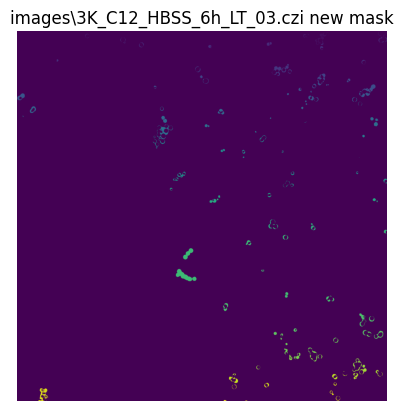

20499


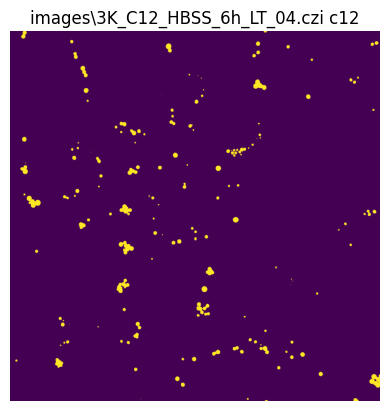

4860


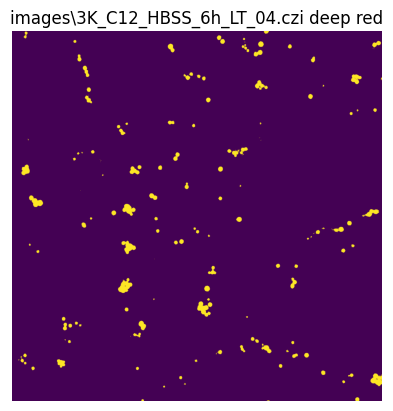

Object 1: Area = 90.0, Perimeter = 59.01, Circularity = 0.32
Object 2: Area = 65.0, Perimeter = 34.76, Circularity = 0.68
Object 3: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 4: Area = 41.0, Perimeter = 34.14, Circularity = 0.44
Object 5: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 6: Area = 163.0, Perimeter = 46.21, Circularity = 0.96
Object 7: Area = 38.0, Perimeter = 22.14, Circularity = 0.97
Object 8: Area = 3.0, Perimeter = 3.41, Circularity = 3.23
Object 9: Area = 181.0, Perimeter = 48.04, Circularity = 0.99
Object 10: Area = 48.0, Perimeter = 31.73, Circularity = 0.60
Object 11: Area = 28.0, Perimeter = 22.69, Circularity = 0.68
Object 12: Area = 127.0, Perimeter = 93.77, Circularity = 0.18
Object 13: Area = 112.0, Perimeter = 60.46, Circularity = 0.39
Object 14: Area = 4.0, Perimeter = 4.62, Circularity = 2.35
Object 15: Area = 8.0, Perimeter = 6.83, Circularity = 2.16
Object 16: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 17: Area = 1.0, Pe

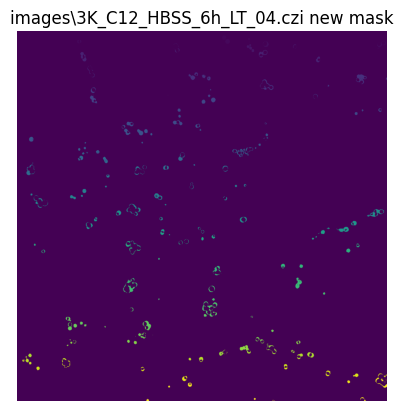

17440


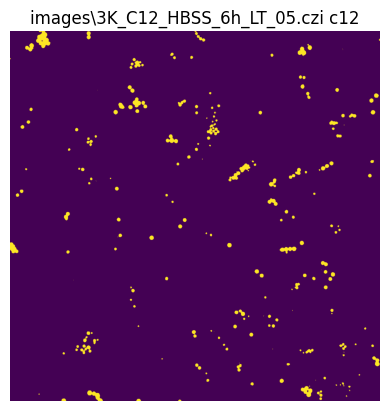

10240


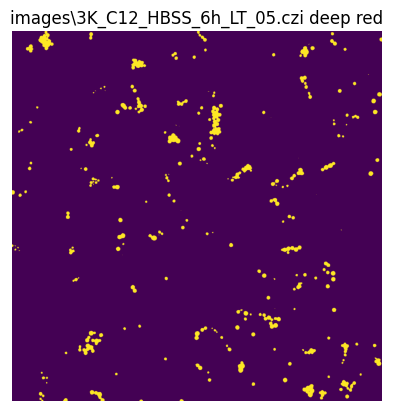

Object 1: Area = 113.0, Perimeter = 77.91, Circularity = 0.23
Object 2: Area = 4.0, Perimeter = 4.62, Circularity = 2.35
Object 3: Area = 18.0, Perimeter = 13.66, Circularity = 1.21
Object 4: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 5: Area = 48.0, Perimeter = 32.11, Circularity = 0.59
Object 6: Area = 6.0, Perimeter = 5.41, Circularity = 2.57
Object 7: Area = 10.0, Perimeter = 9.41, Circularity = 1.42
Object 8: Area = 83.0, Perimeter = 32.14, Circularity = 1.01
Object 9: Area = 4.0, Perimeter = 3.21, Circularity = 4.89
Object 10: Area = 40.0, Perimeter = 34.31, Circularity = 0.43
Object 11: Area = 12.0, Perimeter = 10.04, Circularity = 1.50
Object 12: Area = 3.0, Perimeter = 3.41, Circularity = 3.23
Object 13: Area = 16.0, Perimeter = 14.41, Circularity = 0.97
Object 14: Area = 17.0, Perimeter = 15.04, Circularity = 0.94
Object 15: Area = 47.0, Perimeter = 31.69, Circularity = 0.59
Object 16: Area = 12.0, Perimeter = 11.45, Circularity = 1.15
Object 17: Area = 4.0, Peri

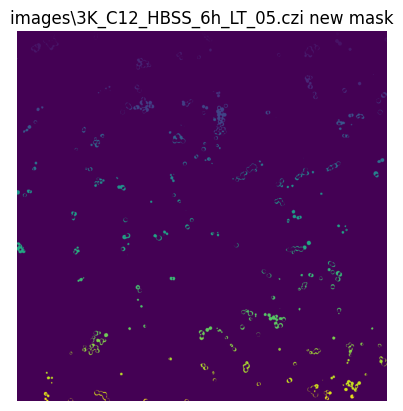

19070


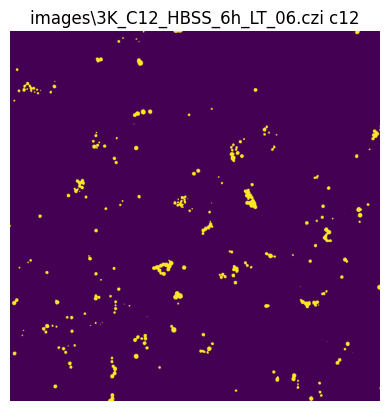

8425


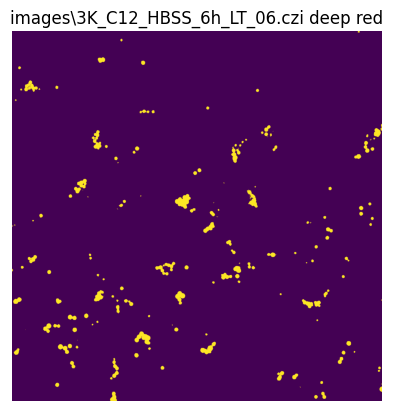

Object 1: Area = 23.0, Perimeter = 15.66, Circularity = 1.18
Object 2: Area = 142.0, Perimeter = 64.76, Circularity = 0.43
Object 3: Area = 97.0, Perimeter = 49.38, Circularity = 0.50
Object 4: Area = 23.0, Perimeter = 15.90, Circularity = 1.14
Object 5: Area = 20.0, Perimeter = 16.49, Circularity = 0.92
Object 6: Area = 74.0, Perimeter = 48.01, Circularity = 0.40
Object 7: Area = 10.0, Perimeter = 8.83, Circularity = 1.61
Object 8: Area = 3.0, Perimeter = 1.00, Circularity = 37.70
Object 9: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 10: Area = 3.0, Perimeter = 1.41, Circularity = 18.85
Object 11: Area = 4.0, Perimeter = 3.21, Circularity = 4.89
Object 12: Area = 199.0, Perimeter = 79.98, Circularity = 0.39
Object 13: Area = 38.0, Perimeter = 35.66, Circularity = 0.38
Object 14: Area = 2.0, Perimeter = 0.00, Circularity = 0.00
Object 15: Area = 3.0, Perimeter = 3.41, Circularity = 3.23
Object 16: Area = 1.0, Perimeter = 0.00, Circularity = 0.00
Object 17: Area = 4.0, Perim

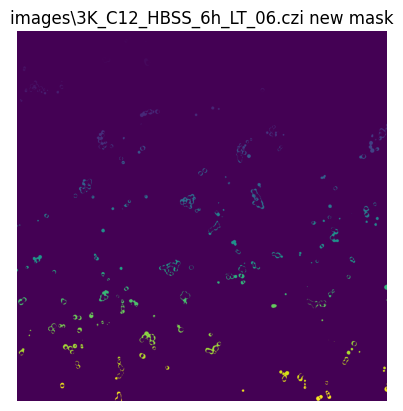

In [ ]:
def main(image_folder):

    images_to_analyze = extract_image_paths(image_folder)

    # Iterate over each image
    for path in images_to_analyze:
        c12_mask = analyze_image_c12(path)
        deep_red_mask = analyze_image_deep_red(path)
        
        new_masks = substract_masks(c12_mask, deep_red_mask)
        display_image(new_masks, path, "new mask")
        


if __name__ == "__main__":
    image_folder = 'images'
    main(image_folder)